# Lab-3.2: Torch-vision

In this lab we do an introduction to torch-vision, which is a common deep-learning library used for computer-vision. 

The lab is a bit long but there isn't that much coding. Since it is a holiday week this should be a fairly easy lab.(enjoy your week off!!) 
 
**Submission:**
* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc


## Torch-vision

* This library is part of the PyTorch project. PyTorch is an open source machine learning framework.

* The torch-vision package consists of popular datasets, model architectures, and common image transformations for computer vision.
  
* https://pytorch.org/vision/stable/index.html

* More information can be found at the following link 


Package Reference

- Models and pre-trained weights
  - [General information on pre-trained weights](https://pytorch.org/vision/stable/models.html#general-information-on-pre-trained-weights)
  - [Classification](https://pytorch.org/vision/stable/models.html#classification)
  - [Semantic Segmentation](https://pytorch.org/vision/stable/models.html#semantic-segmentation)
  - [Object Detection, Instance Segmentation and Person Keypoint Detection](https://pytorch.org/vision/stable/models.html#object-detection-instance-segmentation-and-person-keypoint-detection)
  - [Video Classification](https://pytorch.org/vision/stable/models.html#video-classification)
  - [Optical Flow](https://pytorch.org/vision/stable/models.html#optical-flow)
- Datasets
  - [Built-in datasets](https://pytorch.org/vision/stable/datasets.html#built-in-datasets)
  - [Base classes for custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets)
- Utils
  - [draw_bounding_boxes](https://pytorch.org/vision/stable/generated/torchvision.utils.draw_bounding_boxes.html)
  - [draw_segmentation_masks](https://pytorch.org/vision/stable/generated/torchvision.utils.draw_segmentation_masks.html)
  - [draw_keypoints](https://pytorch.org/vision/stable/generated/torchvision.utils.draw_keypoints.html)
  - [flow_to_image](https://pytorch.org/vision/stable/generated/torchvision.utils.flow_to_image.html)
  - [make_grid](https://pytorch.org/vision/stable/generated/torchvision.utils.make_grid.html)
  - [save_image](https://pytorch.org/vision/stable/generated/torchvision.utils.save_image.html)
- Operators
  - [Detection and Segmentation Operators](https://pytorch.org/vision/stable/ops.html#detection-and-segmentation-operators)
  - [Box Operators](https://pytorch.org/vision/stable/ops.html#box-operators)
  - [Losses](https://pytorch.org/vision/stable/ops.html#losses)
  - [Layers](https://pytorch.org/vision/stable/ops.html#layers)
- Reading/Writing images and videos
  - [Video](https://pytorch.org/vision/stable/io.html#video)
  - [Fine-grained video API](https://pytorch.org/vision/stable/io.html#fine-grained-video-api)
  - [Image](https://pytorch.org/vision/stable/io.html#image)
- Feature extraction for model inspection
  - [API Reference](https://pytorch.org/vision/stable/feature_extraction.html#api-reference)

Examples and training references

- [Example gallery](https://pytorch.org/vision/stable/auto_examples/index.html)
- [Training references](https://pytorch.org/vision/stable/training_references.html)

#### Import packages

In [1]:
import torch 
import torchvision
import matplotlib.pyplot as plt

/Users/yihuiliu_/opt/anaconda3/envs/anly590/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Load image

<class 'torch.Tensor'>
torch.uint8
torch.Size([3, 3024, 4032])


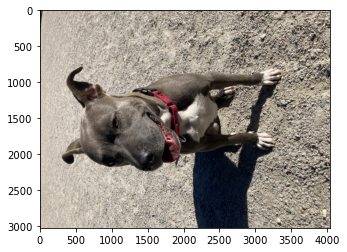

In [2]:
x=torchvision.io.read_image('luna-2.jpeg')
print(type(x))
print(x.dtype)
print(x.shape)
plt.imshow(x.permute(1, 2, 0))

## Transformation examples with Torch-vision

#### Rotatation
* angle (number) – rotation angle value in degrees, counter-clockwise.
* expand (bool, optional) – Optional expansion flag. If true, expands the output image to make it large enough to hold the entire rotated image. 
  * If false or omitted, make the output image the same size as the input image. Note that the expand flag assumes rotation around the center and no translation.



shape before: torch.Size([3, 3024, 4032])
shape after: torch.Size([3, 4032, 3024])


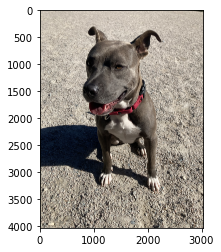

In [3]:
print("shape before:", x.shape)
x=torchvision.transforms.functional.rotate(x,-90,expand=True)
print("shape after:", x.shape)
plt.imshow(x.permute(1, 2, 0))


#### Change resolution

* Resize the input image to the given size. If the image is torch Tensor, it is expected to have […, H, W] shape, where … means an arbitrary number of leading dimensions



shape before: torch.Size([3, 4032, 3024])
shape after: torch.Size([3, 201, 151])


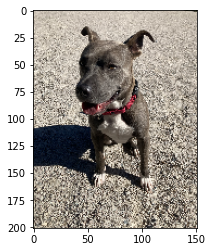

In [4]:
# NUMBER BETWEEN 0 AND 1 TO DOWNSAMPLE IMAGE BY
scale_factor=0.05 

# NEW HEIGHT AND WIDTH
H=int(scale_factor*x.shape[-2])
W=int(scale_factor*x.shape[-1])

# RESIZE
resize=torchvision.transforms.Resize((H,W))

#SHOW OUTPUT
print("shape before:", x.shape)
x=resize(x)
print("shape after:", x.shape)
plt.imshow(x.permute(1, 2, 0))


shape before: torch.Size([3, 201, 151])
shape after: torch.Size([3, 201, 151])


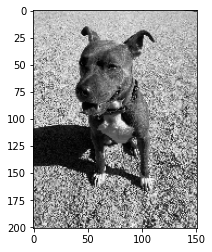

In [5]:
# Grayscale version of the input.
# If num_output_channels == 1 : returned image is single channel
# If num_output_channels == 3 : returned image is 3 channel with r == g == b
transform=torchvision.transforms.Grayscale(3)
x1=transform(x)
print("shape before:", x.shape)
plt.imshow(x1.permute(1, 2, 0))
print("shape after:", x1.shape)

**INSTRUCTIONS** 

* Code the following transformations below using the following link as reference
  * **For more see:** https://pytorch.org/vision/stable/transforms.html

* Don't over-write the original tensor x, instead define a temporary tensor x1 for the the transformed tensor

**Assignment-3.2.1: Padding**

* Padding on each border. If a single int is provided this is used to pad all borders.
   
* If sequence of length 2 is provided this is the padding on left/right and top/bottom respectively.
* Fill (number or tuple) – Pixel fill value for constant fill. Default is 0. If a tuple of length 3, it is used to fill R, G, B channels respectively.

original torch.Size([3, 201, 151])
transformed torch.Size([3, 225, 175])


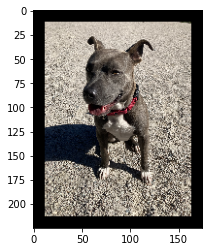

In [15]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW
transform_p1 = torchvision.transforms.Pad(12)
x_p1 = transform_p1(x)
print("original", x.shape)
plt.imshow(x_p1.permute(1, 2, 0))
print("transformed", x_p1.shape)

padH= 20 padW= 60
original torch.Size([3, 201, 151])
transformed torch.Size([3, 221, 211])


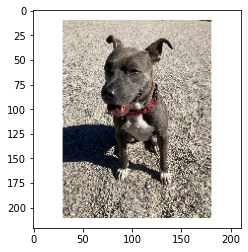

In [7]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW
transform_p2 = torchvision.transforms.Pad((30,10),fill=255)
x_p2 = transform_p2(x)
print("padH=", x_p2.shape[1]-x.shape[1], "padW=", x_p2.shape[2]-x.shape[2])
print("original", x.shape)
plt.imshow(x_p2.permute(1, 2, 0))
print("transformed", x_p2.shape)

original torch.Size([3, 201, 151])
transformed torch.Size([3, 401, 351])


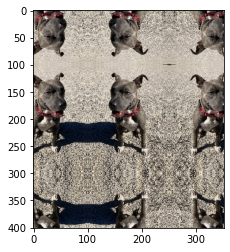

In [8]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW
transform_p3 = torchvision.transforms.Pad(100, padding_mode = "reflect")
x_p3 = transform_p3(x)
print("original", x.shape)
plt.imshow(x_p3.permute(1, 2, 0))
print("transformed", x_p3.shape)

**Assignment-3.2.2: JITTER** 

* Randomly change the brightness, contrast, saturation and hue of an image. 


original torch.Size([3, 201, 151])
transformed torch.Size([3, 201, 151])


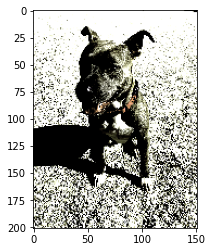

In [10]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW
transform_j1 = torchvision.transforms.ColorJitter(brightness=(0.5,1.5), contrast=(2), saturation=(0,1), hue=(0,0.1))
x_j1 = transform_j1(x)
print("original", x.shape)
plt.imshow(x_j1.permute(1, 2, 0))
print("transformed", x_j1.shape)

**Assignment-3.2.3: RANDOM CROP** 

* Crop the given image at a random location.

* Desired output size of the crop. If size is an int instead of sequence like (h, w), a square crop (size, size) is made.


original torch.Size([3, 201, 151])
transformed torch.Size([3, 50, 50])


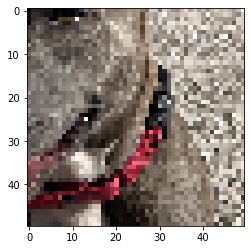

In [12]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW (NOTE OUTPUT SILL BE DIFFERENT DUE TO RANDOMNESS)
transform_rc1 = torchvision.transforms.RandomCrop(size=50)
x_rc1 = transform_rc1(x)
print("original", x.shape)
plt.imshow(x_rc1.permute(1, 2, 0))
print("transformed", x_rc1.shape)

original torch.Size([3, 201, 151])
transformed torch.Size([3, 50, 100])


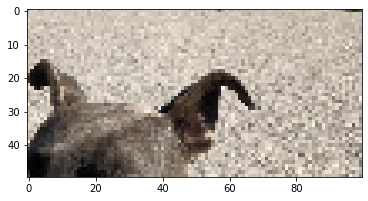

In [13]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW (NOTE OUTPUT SILL BE DIFFERENT DUE TO RANDOMNESS)
transform_rc2 = torchvision.transforms.RandomCrop(size=(50,100))
x_rc2 = transform_rc2(x)
print("original", x.shape)
plt.imshow(x_rc2.permute(1, 2, 0))
print("transformed", x_rc2.shape)

original torch.Size([3, 201, 151])
after crop torch.Size([3, 50, 60])
after pad torch.Size([3, 200, 150])


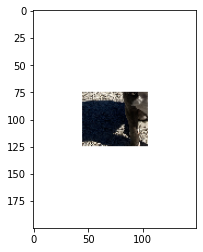

In [16]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW (NOTE OUTPUT SILL BE DIFFERENT DUE TO RANDOMNESS)(CROP+PAD)
#CROP
transform_rc3 = torchvision.transforms.RandomCrop(size=(50,60))
x_rc3 = transform_rc3(x)
print("original", x.shape)
print("after crop", x_rc3.shape)

#PAD
transform_p3 = torchvision.transforms.Pad((45,75),fill=255)
x_p3 = transform_p3(x_rc3)
print("after pad", x_p3.shape)
plt.imshow(x_p3.permute(1, 2, 0))

**Assignment-3.2.4: RANDOM ROTATE** 

* Rotate the image by angle. If the image is torch Tensor
  
* degrees (sequence or number) – Range of degrees to select from. If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees).
* expand (bool, optional) – Optional expansion flag. If true, expands the output to make it large enough to hold the entire rotated image. 
* If false or omitted, make the output image the same size as the input image. Note that the expand flag assumes rotation around the center and no translation.

original torch.Size([3, 201, 151])
transformed torch.Size([3, 201, 151])


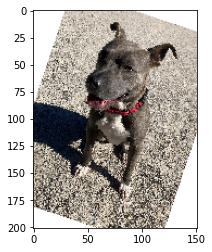

In [17]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW (NOTE OUTPUT SILL BE DIFFERENT DUE TO RANDOMNESS)
transform_rr = torchvision.transforms.RandomRotation(30,fill=255)
x_rr = transform_rr(x)
print("original", x.shape)
plt.imshow(x_rr.permute(1, 2, 0))
print("transformed", x_rr.shape)

**Assignment-3.2.5: NORMALIZE** 

* Normalize a tensor image with mean and standard deviation. 
  
* This transform does not support PIL Image. Given mean: (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels, 
  
* This transform will normalize each channel of the input torch.*Tensor i.e., output[channel] = (input[channel] - mean[channel]) / std[channel]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


original torch.Size([3, 201, 151])
transformed torch.Size([3, 201, 151])


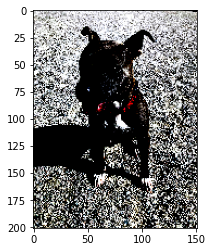

In [18]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW (NOTE OUTPUT SILL BE DIFFERENT DUE TO RANDOMNESS)
transform_n = torchvision.transforms.Normalize(mean=(142.9925, 134.8592, 125.6389), std=(72.4379, 70.4008, 64.9320))
x_n = transform_n(x.float())
print("original", x.shape)
plt.imshow(x_n.permute(1, 2, 0))
print("transformed", x_n.shape)

#### Conversion from tensor to PIL

* PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities.

* Convert a tensor or an ndarray to PIL Image. This transform does not support torchscript.
  
* Converts a torch.*Tensor of shape C x H x W or a numpy ndarray of shape H x W x C to a PIL Image while preserving the value range.



In [19]:
transform=torchvision.transforms.ToPILImage()
print(type(x))
x1=transform(x)
print(type(x1))
x1.show()

<class 'torch.Tensor'>
<class 'PIL.Image.Image'>


## Scripted Transformation

* We can do also do multiple transformations at once in a row 
  
* In order to script the transformations, please use torch.nn.Sequential instead of Compose.


original: torch.Size([3, 201, 151])
transformed: torch.Size([3, 100, 100])


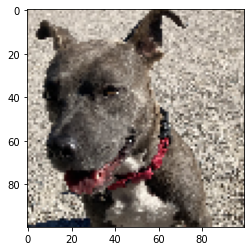

In [20]:
transforms = torch.nn.Sequential(
    torchvision.transforms.RandomRotation((-50,50), expand=False,fill=255),
    torchvision.transforms.RandomCrop((100,100), padding=None, pad_if_needed=False, fill=0, padding_mode='constant')
)

#Scripting a function or nn.Module will inspect the source code, compile it as TorchScript code using the TorchScript compiler
scripted_transforms = torch.jit.script(transforms)

x1=scripted_transforms(x)
print("original:",x.shape)
print("transformed:",x1.shape)
plt.imshow(x1.permute(1, 2, 0)); plt.show()

**Assignment-3.2.6: SCRIPTED TRANSFORM** 

* Use the code above as a starting point. Add code to do the following transformations
  * RandomAdjustSharpness 
  * RandomAutocontrast
  * RandomInvert
  * RandomRotation

original: torch.Size([3, 201, 151])
transformed: torch.Size([3, 201, 151])


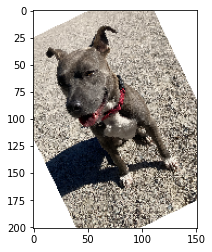

In [21]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW (NOTE OUTPUT SILL BE DIFFERENT DUE TO RANDOMNESS)
transforms_st = torch.nn.Sequential(
    torchvision.transforms.RandomAdjustSharpness(sharpness_factor=1.5,p=0.5),
    torchvision.transforms.RandomAutocontrast(p=0.5),
    torchvision.transforms.RandomInvert(p=0.4),
    torchvision.transforms.RandomRotation(30,fill=255)
)

scripted_transforms_st = torch.jit.script(transforms_st)

print("original:",x.shape)
x2 = scripted_transforms_st(x)
print("transformed:",x2.shape)
plt.imshow(x2.permute(1, 2, 0)); plt.show()

## Automatic Augmentation Transforms

* As discussed in the lecture, Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.
  
*  It acts as a regularizer and helps reduce over-fitting when training a machine learning model.[1] It is closely related to oversampling in data analysis.

* AutoAugment is a common Data Augmentation technique that can improve the accuracy of Image Classification models. 

* Though the data augmentation policies are directly linked to their trained dataset, empirical studies show that ImageNet policies provide significant improvements when applied to other datasets. 

* In TorchVision we implemented 3 policies learned on the following datasets: ImageNet, CIFAR10 and SVHN. 

* The new transform can be used standalone or mixed-and-matched with existing transforms:



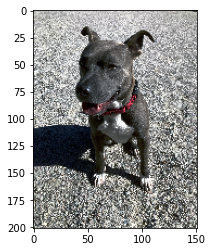

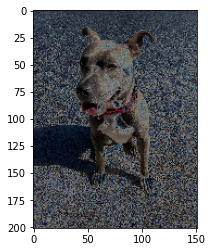

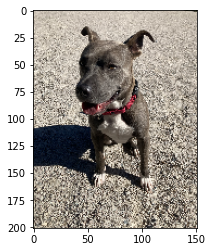

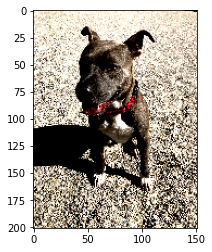

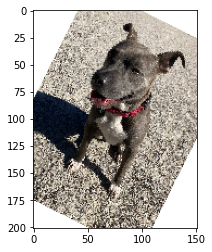

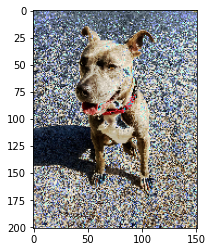

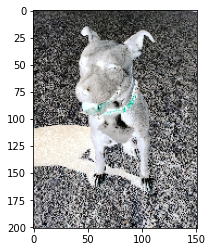

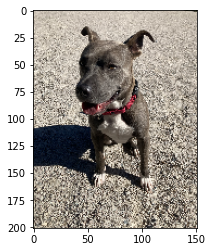

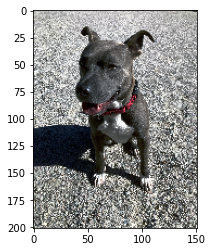

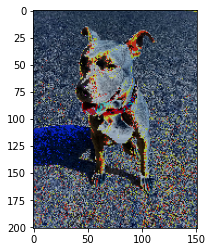

In [22]:
# TORCH-VISION HAS VARIOUS BUILT IN DATA AUGMENTATION METHODS, THE FOLLOWING IS AN EXAMPLE OF ONE
transform=torchvision.transforms.AutoAugment(fill=255)

# SHOW SEVERAL AUGMENTED IMAGES 
for i in range(0,10):
    x1=transform(x)
    plt.imshow(x1.permute(1, 2, 0)); plt.show()


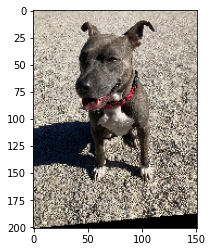

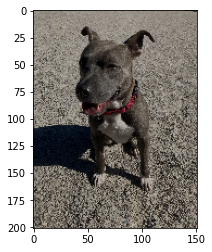

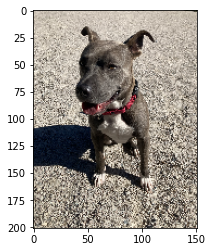

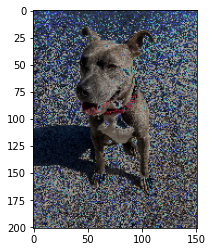

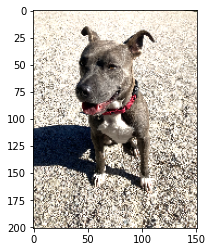

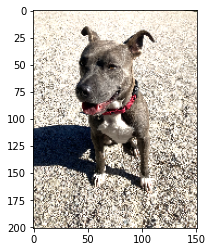

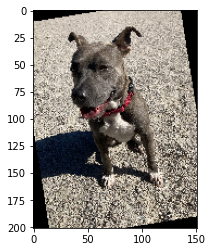

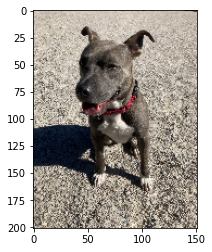

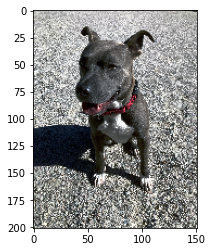

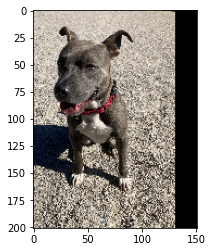

In [23]:
# TORCH-VISION HAS VARIOUS BUILT IN DATA AUGMENTATION METHODS, THE FOLLOWING IS AN EXAMPLE OF ANOTHER ONE
transform=torchvision.transforms.RandAugment(num_ops=1)

# SHOW SEVERAL AUGMENTED IMAGES 
for i in range(0,10):
    x1=transform(x)
    plt.imshow(x1.permute(1, 2, 0)); plt.show()


### Utility functions 
Torch vision also has several useful utility functions including the following 
* draw_bounding_boxes
* draw_segmentation_masks
* draw_keypoints
* flow_to_image
* make_grid
* save_image

**Assignment-3.2.7: BOUNDING BOX** 
* torchvision.utils.draw_bounding_boxes
  * image (Tensor) – Tensor of shape (C x H x W) and dtype uint8.
  * boxes (Tensor) – Tensor of size (N, 4) containing bounding boxes in (xmin, ymin, xmax, ymax) format. Note that the boxes are absolute coordinates with respect to the image.
    *  In other words: 0 <= xmin < xmax < W and 0 <= ymin < ymax < H.
 *  labels (List[str]) – List containing the labels of bounding boxes.

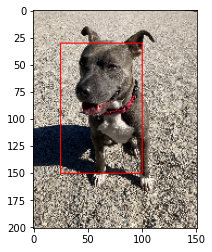

In [24]:
#INSERT CODE TO GENERATE THE OUTPUT SHOWN BELOW (use torchvision.utils.draw_bounding_boxes)
from torchvision.utils import draw_bounding_boxes

box = [25, 30, 100, 150]
box = torch.tensor(box, dtype=torch.int)
box = box.unsqueeze(0)

x_b = torchvision.utils.draw_bounding_boxes(x, boxes=box, colors="red")
plt.imshow(x_b.permute(1, 2, 0))

## Models and pre-trained weights

See here for more information: https://pytorch.org/vision/stable/models.html

The torchvision.models subpackage contains definitions of models for addressing different tasks, including: image classification, pixelwise semantic segmentation, object detection, instance segmentation, person keypoint detection, video classification, and optical flow.

Here is an example of how to use the pre-trained image classification models:


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /Users/yihuiliu_/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████████████████████████████████| 97.8M/97.8M [00:03<00:00, 29.5MB/s]


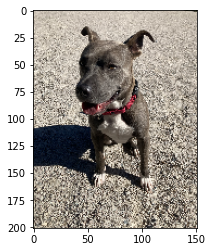

American Staffordshire terrier: 27.0%


In [25]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights

img = x

# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
plt.imshow(x.permute(1, 2, 0)); plt.show()
print(f"{category_name}: {100 * score:.1f}%")

Here is an example of how to use the pre-trained semantic segmentation models:

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /Users/yihuiliu_/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|████████████████████████████████████████| 135M/135M [00:04<00:00, 30.6MB/s]


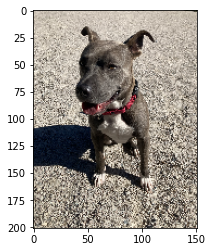

torch.Size([692, 520])


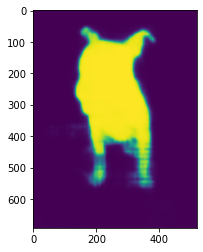

In [26]:
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image

img = x

# Step 1: Initialize model with the best available weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(batch)["out"]
normalized_masks = prediction.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["dog"]]
plt.imshow(x.permute(1, 2, 0)); plt.show()
print(mask.shape)
plt.imshow(mask.detach().numpy()); plt.show()

# to_pil_image(mask).show()

Here is an example of how to use the pre-trained object detection models:

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /Users/yihuiliu_/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|████████████████████████████████████████| 167M/167M [00:10<00:00, 16.8MB/s]
/Users/yihuiliu_/opt/anaconda3/envs/anly590/lib/python3.9/site-packages/torchvision/utils.py:237: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


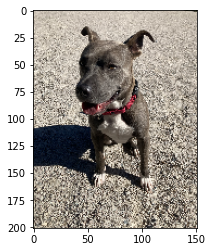

torch.Size([692, 520])


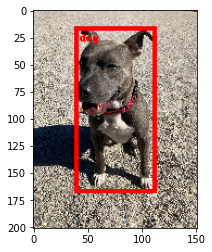

In [27]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

img = x #read_image("test/assets/encode_jpeg/grace_hopper_517x606.jpg")

# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)

plt.imshow(x.permute(1, 2, 0)); plt.show()
print(mask.shape)
plt.imshow(box.permute(1, 2, 0)); plt.show()


### Keras pre-trained models

In [28]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

model = ResNet50(weights='imagenet')

img_path = 'luna-2.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

# plt.imshow(x.reshape(224, 224, 3)); plt.show()


2022-10-20 18:24:43.839633: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


49152/35363 [=========================================] - 0s 1us/step
Predicted: [('n02093428', 'American_Staffordshire_terrier', 0.80000395), ('n02091032', 'Italian_greyhound', 0.08285838), ('n02092339', 'Weimaraner', 0.04952284)]
